# <img style="float: left; padding-right: 10px; width: 45px" src="fig/iacs.png"> S-109A Introduction to Data Science 
## Homework 4 - Regularization 



**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 

<hr style="height:2pt">

In [1]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()

import these libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold

#import statsmodels.api as sm

from pandas.core import datetools
%matplotlib inline

# Continuing Bike Sharing Usage Data

In this homework, we will focus on regularization and cross validation. We will continue to build regression models for the Capital Bikeshare program in Washington D.C.  See homework 3 for more information about the Capital Bikeshare data that we'll be using extensively. 



## Data Preparation



<div class='exercise'> <b> Question 1 </b> </div> 
  In HW3 Questions 1-3, you preprocessed the data in preparation for your regression analysis. We ask you to repeat those steps (particularly those in Question 3) so that we can compare the analysis models in this HW with those you developed in HW3.  In this HW we'll be using models from sklearn exclusively (as opposed to statsmodels)
  
**1.1** [From HW3] Read `data/BSS_train.csv` and `data/BSS_test.csv` into dataframes `BSS_train` and `BSS_test`, respectively.  Remove the `dteday` column from both train and test dataset. We do not need it, and its format cannot be used for analysis.  Also remove the `casual` and `registered` columns for both training and test datasets as they make  `count` trivial.   

**1.2** Since we'll be exploring Regularization and Polynomial Features, it will make sense to standardize our data.  Standardize the numerical features. Store the dataframes for the processed training and test predictors into the variables `X_train` and `X_test`.  Store the appropriately shaped numpy arrays for the corresponding train and test `count` columns into `y_train` and `y_test`.

**1.3** Use the `LinearRegression` library from `sklearn` to fit a multiple linear regression model to the training set data in `X_train`.  Store the fitted model in the variable `BikeOLSModel`.

**1.4** What are the training and test set $R^2$ scores?  Store the training and test $R^2$ scores of the `BikeOLSModel` in a dictionary `BikeOLS_r2scores` using the string 'training' and 'test' as keys.  

**1.5**   We're going to use bootstrapped confidence intervals (use 500 bootstrap iterations) to determine which of the estimated coefficients for the `BikeOLSModel` are statistically significant at a significance level of 5% .  We'll do so by creating 3 different functions:

1. `make_bootstrap_sample(dataset_X, dataset_y)` returns a bootstrap sample of `dataset_X` and `dataset_y`
2. `calculate_coefficients(dataset_X, dataset_y, model)` returns in the form of a dictionary regression coefficients calculated by your model on `dataset_X` and `dataset_y`.  The keys for regression coefficients dictionary should be the names of the features.  The values should be the coefficient values of that feature calculated on your model.  An example would be {'hum': 12.3, 'windspeed': -1.2, 'Sunday': 0.6 ... }
3. `get_significant_predictors(regression_coefficients, significance_level)` takes as input a list of regression coefficient dictionaries (each one the output of `calculate_coefficients` and  returns a python list of the feature names of the significant predictors e.g. ['Monday', 'hum', 'holiday', ... ]

In the above functions `dataset_X` should always be a pandas dataframe with your features, `dataset_y` a numpy column vector with the values of the response variable and collectively they form the dataset upon which the operations take place. `model` is the `sklearn` regression model that will be used to generate the regression coefficients. `regression_coefficients` is a list of dictionaries of numpy arrays with each numpy array containing the regression coefficients (not including the intercept) calculated from one bootstrap sample.  `significance_level` represents the significance level as a floating point number.  So a 5% significance level should be represented as 0.05.  


Store the feature names as a list of strings in the variable `BikeOLS_significant_bootstrap` and print them for your answer.


### Answers

#### 1.1 Read `data/BSS_train.csv` and `data/BSS_test.csv` into Pandas DataFrames

In [3]:
# your code here
BSS_train = pd.read_csv("data/BSS_train.csv", index_col=0)
BSS_test = pd.read_csv("data/BSS_test.csv", index_col=0)

drop_columns = ['dteday', 'casual', 'registered']
BSS_train = BSS_train.drop(drop_columns, axis=1)
BSS_test = BSS_test.drop(drop_columns, axis=1)

#### 1.2 Standardizing our data

In [4]:
# your code here
num_features =  ['hum', 'temp', 'atemp', 'windspeed']

scaler = StandardScaler()
for feat in num_features:
    BSS_train[feat] = scaler.fit_transform(BSS_train[feat].values.reshape(-1,1))
    BSS_test[feat] = scaler.fit_transform(BSS_test[feat].values.reshape(-1,1))

y_train = BSS_train["counts"]
y_test = BSS_test["counts"]
x_train = BSS_train.drop("counts", axis=1)
x_test = BSS_test.drop("counts", axis=1)

#### 1.3 Use the `LinearRegression` library from `sklearn` to fit a multiple linear regression.

In [5]:
# your code here
BikeOLSModel = LinearRegression().fit(x_train, y_train)

#### 1.4 What are the training and test set $R^2$ scores? Store the $R^2$ scores of the `BikeOLSModel` on the training and test sets in a dictionary `BikeOLS_r2scores`. 

<HR>
Training and test R2 scores are:  {'test': 0.40540416900870035, 'training': 0.4065387827969087}
<HR>

In [6]:
# your code here
y_train_pred = BikeOLSModel.predict(x_train)
y_test_pred = BikeOLSModel.predict(x_test)

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

BikeOLS_r2scores = {'test': r2_test, 'training': r2_train}
print('Training and test R2 scores are: ', BikeOLS_r2scores)

Training and test R2 scores are:  {'test': 0.40540416900870035, 'training': 0.4065387827969087}


#### 1.5 We're going to use bootstrapped confidence intervals to determine which of the estimated coefficients ...

In [7]:
# your code here

# dataset_x should be a pandas dataframe

## accepts dataset inputs as numpy arrays
def make_bootstrap_sample(dataset_X, dataset_y, size = None):
        
    # by default return a bootstrap sample of the same size as the original dataset
    if not size: size = len(dataset_X)
    
    # if the X and y datasets aren't the same size, raise an exception
    if len(dataset_X) != len(dataset_y):
        raise Exception("Data size must match between dataset_X and dataset_y")
    
    # select indices that are in the resample (easiest way to be sure we grab y values that match the x values)
    inds_to_sample = np.random.choice(dataset_X.shape[0], size=size, replace=True)
    # take the sample
    dataset_X_resample = dataset_X.values[inds_to_sample]
    dataset_y_resample = dataset_y.values[inds_to_sample]
    
    # return as a tuple your bootstrap samples of dataset_X as a pandas dataframe
    bootstrap_dataset_X = dataset_X_resample
    # and your bootstrap samples of dataset y as a numpy column vector
    bootstrap_dataset_y = dataset_y_resample
    
    return (bootstrap_dataset_X, bootstrap_dataset_y)
    

def calculate_coefficients(dataset_X, dataset_y, model):
    
    # your code here
    # return coefficients  in the variable  coefficients_dictioanry as a dictionary
    coefficients_dictionary = dict()
    # with the key being the name of the feature as a string
    # the value being the value of the coefficients
    # do not return the intercept as part of this
    for feature, column in dataset_X.iteritems():
        idx = dataset_X.columns.get_loc(feature)
        beta = model.coef_[idx]
        coefficients_dictionary[feature] = beta
    
    return coefficients_dictionary


def get_significant_predictors(regression_coefficients, significance_level):
    
    # your code here
    significant_coefficients = []
    reg_coeff_df = pd.DataFrame(regression_coefficients)
    
    for column_name, column_data in reg_coeff_df.iteritems():
        lower_limit, upper_limit = np.percentile(column_data, [5,95])
        if(lower_limit < significance_level):
            significant_coefficients.append(column_name)
    
    # return the significant coefficients as a list of strings
    return significant_coefficients

In [8]:
N = 1000
significance_level = .05
regression_coefficients = []
for i in range(N):
    bootstrap_dataset_X, bootstrap_dataset_y = make_bootstrap_sample(x_train, y_train)
    bootstrap_model = LinearRegression().fit(bootstrap_dataset_X, bootstrap_dataset_y)
    coefficients_dictionary = calculate_coefficients(x_train, y_test, bootstrap_model)
    regression_coefficients.append(coefficients_dictionary)

BikeOLS_significant_bootstrap = get_significant_predictors(regression_coefficients, significance_level)
print("Significant Preditors are: ", BikeOLS_significant_bootstrap)

Significant Preditors are:  ['Apr', 'Aug', 'Dec', 'Feb', 'Fri', 'Jul', 'Jun', 'Mar', 'May', 'Mon', 'Nov', 'Oct', 'Sept', 'Snow', 'Storm', 'Thu', 'Tue', 'Wed', 'atemp', 'holiday', 'hum']


## Penalization Methods

In HW 3 Question 5 we explored using subset selection to find a significant subset of features.  We then fit a regression model just on that subset of features instead of on the full dataset (including all features).   As an alternative to selecting a subset of predictors and fitting a regression model on the subset, one can fit a linear regression model on all predictors, but shrink or regularize the coefficient estimates to make sure that the model does not "overfit" the training set. 

<div class='exercise'> <b> Question 2 </b> </div> 
  We're going to use Ridge and Lasso regression regularization techniques to fit linear models to the training set.  We'll use cross-validation and shrinkage parameters $\lambda$ from the set $\{.001,.005,1,5,10,50,100,500,1000\}$ to pick the best model for each regularization technique.

**2.1** Use 5-fold cross-validation to pick the best shrinkage parameter from the set $\{.001,.005,1,5,10,50,100,500,1000\}$ for your Ridge Regression model on the training data.  Fit a Ridge Regression model on the training set with the selected shrinkage parameter and store your fitted model in the variable `BikeRRModel`.  Store the selected shrinkage parameter in the variable `BikeRR_shrinkage_parameter`.

**2.2** Use 5-fold cross-validation to pick the best shrinkage parameter from the set $\{.001,.005,1,5,10,50,100,500,1000\}$ for your Lasso Regression model on the training data.  Fit a Lasso Regression model on the training set with the selected shrinkage parameter and store your fitted model in the variable `BikeLRModel`.  Store the selected shrinkage parameter in the variable `BikeLR_shrinkage_parameter`.

**2.3** Create three dictionaries `BikeOLSparams`, `BikeLRparams`, and `BikeRRparams`.  Store in each the corresponding regression coefficients for each of the regression models indexed by the string feature name.

**2.4** For the Lasso and Ridge Regression models list the features that are assigned a coefficient value close to 0 (i.e. the absolute value of the coefficient is less than 0.1).  How closely do they match the redundant predictors found (if any) in HW 3, Question 5?

**2.5** To get a visual sense of how the features different regression models (Multiple Linear Regression, Ridge Regression, Lasso Regression) estimate coefficients, order the features by magnitude of the estimated coefficients in the Multiple Linear Regression Model (no shrinkage).  Plot a bar graph of the magnitude (absolute value) of the estimated coefficients from Multiple Linear Regression in order from greatest to least.  Using a different color (and alpha values) overlay bar graphs of the magnitude of the estimated coefficients (in the same order as the Multiple Linear Regression coefficients) from Ridge and Lasso Regression.

**2.6** Let's examine a pair of features we believe to be related.  Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.

**2.7** Discuss the Results:

1. How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrinkage penalty) in Question 1? 
2. Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.
3. Is the significance related to the shrinkage in some way?

*Hint:* You may use `sklearn`'s `RidgeCV` and `LassoCV` classes to implement Ridge and Lasso regression. These classes automatically perform cross-validation to tune the parameter $\lambda$ from a given range of values.

### Answers

In [9]:
lambdas = [.001, .005, 1, 5, 10, 50, 100, 500, 1000]

#### 2.1 Use 5-fold cross-validation to pick the best shrinkage parameter from the set $\{.001,.005,1,5,10,50,100,500,1000\}$ for your Ridge Regression model.

In [10]:
# your code here
BikeRRModel = RidgeCV(alphas=lambdas, cv=5)
BikeRRModel.fit(x_train, y_train)

print('Selected shrinkage parameter:', BikeRRModel.alpha_)

Selected shrinkage parameter: 500


#### 2.2 Use 5-fold cross-validation to pick the best shrinkage parameter from the set $\{.001,.005,1,5,10,50,100,500,1000\}$ for your Lasso Regression model.

In [11]:
# your code here
BikeLRModel = LassoCV(alphas=lambdas, cv=5)
BikeLRModel.fit(x_train, y_train)

print('Selected shrinkage parameter:', BikeLRModel.alpha_)

Selected shrinkage parameter: 0.005


#### 2.3 Create three dictionaries `BikeOLSparams`, `BikeLRparams`, and `BikeRRparams`.  Store in each the corresponding regression coefficients.

In [12]:
# your code here
BikeOLSparams = dict()
BikeLRparams = dict()
BikeRRparams = dict()

for name, data in x_train.iteritems():
    idx = x_train.columns.get_loc(name)
    BikeOLSparams[name] = BikeOLSModel.coef_[idx]
    BikeLRparams[name] = BikeLRModel.coef_[idx]
    BikeRRparams[name] = BikeRRModel.coef_[idx]

#### 2.4 For the Lasso and Ridge Regression models list the features that are assigned a coefficient value close to 0 ...

In [13]:
# your code here
for key, value in BikeLRparams.items():
    if np.abs(value) <= 0.1:
        print(key)

for key, value in BikeRRparams.items():
    if np.abs(value) <= 0.1:
        print(key)

Mon


<HR>
Monday is the only feature assigned a coefficient value close to 0.
<HR>

#### 2.5 To get a visual sense of how the features different regression models (Multiple Linear Regression, Ridge Regression, Lasso Regression) estimate coefficients, order the features by magnitude of the estimated coefficients in the Multiple Linear Regression Model (no shrinkage).

Text(0,0.5,'Coefficients')

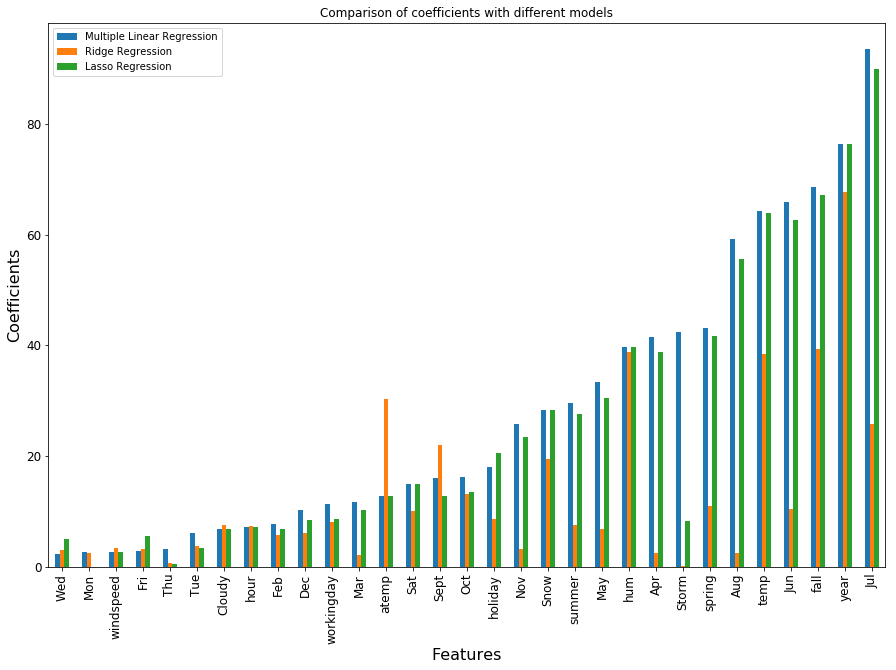

In [14]:
# your code here
column_order = sorted(BikeOLSparams, key=lambda k: abs(BikeOLSparams[k]))
plotDF = pd.DataFrame([BikeOLSparams, BikeRRparams, BikeLRparams], columns=column_order, index=['Multiple Linear Regression', 'Ridge Regression', 'Lasso Regression']).abs()

ax = plotDF.T.plot(kind='bar', title ="Comparison of coefficients with different models", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel('Features', fontsize=16)
ax.set_ylabel('Coefficients', fontsize=16)



#### 2.6 Let's examine a pair of features we believe to be related.  Is there a difference in the way Ridge and Lasso regression assign coefficients ...v

<HR>
Ridge assigns coefficients very close to each other whereas Lasso assigns atemp a coefficient significantly lower than temp. This difference is because temp and atemp are correlated.

Theoretical explanation:<BR>
If a group of predictors are highly correlated, Lasso tends to pick only one of them. While we may not be able to identify all predictors that are associated with the outcome, the size of the coefficients for the variable that are selected essentially represent the maximum effect size of the cluster of correlated predictors. As for Ridge, it assigns similar coefficients to both of them.
<HR>

#### 2.7.1 How do the estimated coefficients compare to or differ from ...

<HR>
The Ridge coefficients are pretty much in the neighborhood of the plain regressor's coefficients. The Lasso coefficients vary significantly. The Lasso coefficients are even inverse in some cases.<HR>

#### 2.7.2 Is there a difference between coefficients estimated by the two shrinkage methods ...

<HR>
Yes there is, as expected. Ridge regression can’t zero coefficients. Lasso does both parameter shrinkage and variable selection automatically because it zero out the co-efficients of collinear variables. Here it helps to select the variable(s) out of given n variables while performing lasso regression.<HR>

#### 2.7.3 Is the significance related to the shrinkage in some way?

<HR>
The penalty causes the regression coefficients to shrink toward zero. This is why penalized regression
methods are also known as shrinkage or regularization methods. 
<BR> In ridge regression, the penalty is the sum of the squares of the coefficients and for the Lasso, it’s the sum of the absolute values of the coefficients. It’s a shrinkage towards zero using an absolute value (l1 penalty) rather than a sum of squares(l2 penalty).
<BR>If the shrinkage is large enough, some regression coefficients are set to zero exactly. Thus, penalized regression methods perform variable selection and coefficient estimation simultaneously.


<HR>

<div class='exercise'> <b> Question 3: Polynomial Features, Interaction Terms, and Cross Validation </b> </div>


We would like to fit a model to include all main effects and polynomial terms for numerical predictors up to the $4^{th}$ order. More precisely use the following terms: 
 - predictors in `X_train` and `X_test`
 - $X^1_j$, $X^2_j$, $X^3_j$, and $X^4_j$ for each numerical predictor $X_j$

**3.1** Create an expanded training set including all the desired terms mentioned above. Store that training set (as a pandas dataframe) in the variable `X_train_poly`.  Create the corresponding test set and store it as a pandas dataframe in `X_test_poly`.

**3.2** Discuss the following:

1. What are the dimensions of this 'design matrix' of all the predictor variables in 3.1?  
2. What issues may we run into attempting to fit a regression model using all of these predictors?

**3.3** Let's try fitting a regression model on all the predictors anyway.  Use the `LinearRegression` library from `sklearn` to fit a multiple linear regression model to the training set data in `X_train_poly`.  Store the fitted model in the variable `BikeOLSPolyModel`.

**3.4** Discuss the following:
1. What are the training and test $R^2$ scores? 
2. How does the model performance compare with the OLS model on the original set of features in Question 1?

**3.5** The training set $R^2$ score we generated for our model with polynomial and interaction terms doesn't have any error bars.  Let's use cross-validation to generate sample sets of $R^2$ for our model. Use 5-fold cross-validation to generate $R^2$ scores for the multiple linear regression model with polynomial terms.  What are the mean and standard deviation of the $R^2$ scores for your model.

**3.6** Visualize the $R^2$ scores generated from the 5-fold cross validation as a box and whisker plot.

**3.7** We've used cross-validation to generate error bars around our $R^2$ scores, but another use of cross-validation is as a way of model selection.  Let's construct the following model alternatives:

1. Multiple linear regression model generated based upon the feature set in Question 1 (let's call these the base features.
2. base features plus polynomial features to order 2
3. base features plus polynomial features to order 4

Use 5-fold cross validation on the training set to select the best model.  Make sure to evaluate all the models as much as possible on the same folds.  For each model generate a mean and standard deviation for the $R^2$ score.

**3.8** Visualize the $R^2$ scores generated for each model from 5-fold cross validation in box and whiskers plots.  Do the box and whisker plots influence your view of which model was best?

**3.9** Evaluate each of the model alternatives on the test set.  How do the results compare with the results from cross-validation?

### Answers

#### 3.1 Create an expanded training set including all the desired terms mentioned above. Store that training set (as a numpy array) in the variable `X_train_poly`....

In [15]:
# your code here
def get_poly_dataset(X_train, X_test, order):
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()
    continuous_cols = ['temp', 'atemp', 'hum', 'windspeed'] 
    for x in X_train_copy.columns:
        if x in continuous_cols: 
            for o in range(2, order+1):
                temp = x
                X_train_copy[temp+'_'+str(o)] = scaler.fit_transform((X_train_copy[x]**o).values.reshape(-1,1))
                X_test_copy[temp+'_'+str(o)] = scaler.fit_transform((X_test_copy[x]**o).values.reshape(-1,1))
    return X_train_copy, X_test_copy

In [16]:
X_train_poly, X_test_poly = get_poly_dataset(x_train, x_test, 4)
X_train_poly.shape

(13903, 43)

#### 3.2.1 What are the dimensions of this 'design matrix'...**

<HR>
Dimensions of the design matrix are 13903 rows x 43 columns
<HR>

#### 3.2.2 What issues may we run into attempting to fit a regression model using all of these predictors? ...**

<HR>
Performance will take a hit <BR> $R^2$ will get affected.<BR> Enormous amounts of data will be required. In order to obtain a statistically sound and reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality.<BR> Complications in visualizing the data.<HR>

#### 3.3 Let's try fitting a regression model on all the predictors anyway.  Use the `LinearRegression` library from `sklearn` to fit a multiple linear regression model ....

In [17]:
# your code here
BikeOLSPolyModel = LinearRegression().fit(X_train_poly, y_train)

#### 3.4.1 What are the training and test $R^2$ scores?

In [18]:
# your code here

print('R squared on training set: {0:6.4}'.format(BikeOLSPolyModel.score(X_train_poly, y_train)))

print('R squared on test set: {0:6.4}'.format(BikeOLSPolyModel.score(X_test_poly, y_test)))

R squared on training set: 0.4223
R squared on test set: 0.4193


<HR>
R squared on training set: 0.4223<BR>
R squared on test set: 0.4193<HR>

#### 3.4.2 How does the model performance compare with the OLS model on the original set of features in Question 1?

<HR>
The model performs minutely better(~2%) compared to the OLS model in Question 1.<HR>

#### 3.5 The training set $R^2$ score we generated for our model with polynomial and interaction terms doesn't have any error bars.  Let's use cross-validation to generate sample...

In [19]:
# your code here
scores = cross_val_score(BikeOLSPolyModel, X_train_poly, y_train, cv=5)
print("R^2 scores: {0}\nMean R^2: {1:6.4}\nStandard Deviation: {2:6.4}".format(scores, np.mean(scores), np.std(scores)))

R^2 scores: [0.10950052 0.3341185  0.21857369 0.33524106 0.3389565 ]
Mean R^2: 0.2673
Standard Deviation: 0.09109


#### 3.6 Visualize the $R^2$ scores generated from the 5-fold cross validation as a box and whisker plot.

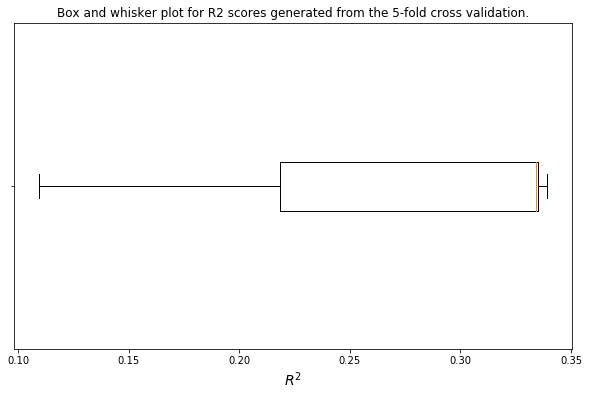

In [20]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(10,6))
plt.boxplot(scores, vert=False)
plt.xlabel(r'$R^2$', fontsize=14)
ax.set_yticklabels([])
plt.title("Box and whisker plot for R2 scores generated from the 5-fold cross validation.")
plt.show()

#### 3.7 We've used cross-validation to generate error bars around our $R^2$ scores, but another use of cross-validation is as a way of model selection.  Let's construct the following model alternatives ...

In [21]:
# your code here
# Create the train and test data
mlr_train, mlr_test = x_train, x_test
x_train_poly2, x_test_poly2 = get_poly_dataset(x_train, x_test, 2)
x_train_poly4, x_test_poly4 = get_poly_dataset(x_train, x_test, 4)

# Create the model and fit train data
base_model = LinearRegression().fit(mlr_train, y_train)
poly2_model = LinearRegression().fit(x_train_poly2, y_train)
poly4_model = LinearRegression().fit(x_train_poly4, y_train)

# Use 5-fold cross validation on the training sets
# Make sure to evaluate all the models as much as possible on the same folds -> cross_val_score does not shuffle
base_r2_scores = cross_val_score(base_model, mlr_train, y_train, cv=5)
poly2_r2_scores = cross_val_score(poly2_model, x_train_poly2, y_train, cv=5)
poly4_r2_scores = cross_val_score(poly4_model, x_train_poly4, y_train, cv=5)

# For each model generate a mean and standard deviation for the R2 score.
base_r2_mean, base_r2_std = np.mean(base_r2_scores), np.std(base_r2_scores)
poly2_r2_mean, poly2_r2_std = np.mean(poly2_r2_scores), np.std(poly2_r2_scores)
poly4_r2_mean, poly4_r2_std = np.mean(poly4_r2_scores), np.std(poly4_r2_scores)

print("Base R^2 scores: {0}\nMean R^2: {1:6.4}\nStandard Deviation: {2:6.4}\n".format(base_r2_scores, base_r2_mean, base_r2_std))
print("Poly 2 R^2 scores: {0}\nMean R^2: {1:6.4}\nStandard Deviation: {2:6.4}\n".format(poly2_r2_scores, poly2_r2_mean, poly2_r2_std))
print("Poly 4 R^2 scores: {0}\nMean R^2: {1:6.4}\nStandard Deviation: {2:6.4}\n".format(poly4_r2_scores, poly4_r2_mean, poly4_r2_std))

Base R^2 scores: [0.10602818 0.33313461 0.19531691 0.32047232 0.33502017]
Mean R^2:  0.258
Standard Deviation: 0.0922

Poly 2 R^2 scores: [0.13695364 0.30934429 0.21222944 0.32103557 0.33673082]
Mean R^2: 0.2633
Standard Deviation: 0.0767

Poly 4 R^2 scores: [0.10950052 0.3341185  0.21857369 0.33524106 0.3389565 ]
Mean R^2: 0.2673
Standard Deviation: 0.09109



#### 3.8 Visualize the $R^2$ scores generated for each model from 5-fold cross validation in box and whiskers plots.  Do the box and whisker plots influence your view of which model was best? ...

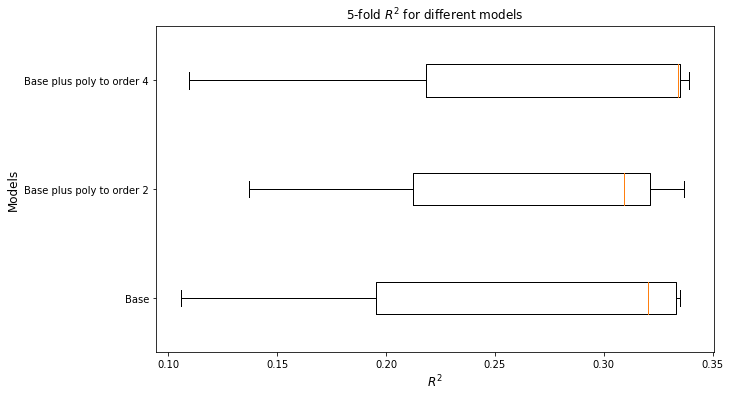

In [22]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(10,6))

data = [base_r2_scores, poly2_r2_scores, poly4_r2_scores]
plt.boxplot(data, vert=False)
plt.ylabel("Models", fontsize=12)
plt.xlabel(r'$R^2$', fontsize=12)
plt.title("5-fold "+r'$R^2$'+" for different models")
plt.yticks([1, 2, 3],['Base', 'Base plus poly to order 2', 'Base plus poly to order 4'])
plt.show()

<HR>
Model with base features plus polynomial of order 4 still looks like the best.
<HR>

#### 3.9 Evaluate each of the model alternatives on the  test set.  How do the results compare with the results from cross-validation?

In [23]:
# your code here
ypred_base = base_model.predict(mlr_test)
ypred_poly2 = poly2_model.predict(x_test_poly2)
ypred_poly4 = poly4_model.predict(x_test_poly4)

print('R squared for base model on test set: {0:6.4}'.format(r2_score(y_test, ypred_base)))
print('R squared for poly2 model on test set: {0:6.4}'.format(r2_score(y_test, ypred_poly2)))
print('R squared for poly4 model on test set: {0:6.4}'.format(r2_score(y_test, ypred_poly4)))


R squared for base model on test set: 0.4054
R squared for poly2 model on test set: 0.4099
R squared for poly4 model on test set: 0.4193


<HR>
Results align with the results from Cross-Validation i.e. model with base features plus polynomial features to order 4 is the best model.<HR>